<a href="https://colab.research.google.com/github/junyoungg/mppi_cem_tutorial/blob/main/mppi_cem_tutorial_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/junyoungg/mppi_cem_tutorial.git

Cloning into 'mppi_cem_tutorial'...
remote: Enumerating objects: 579, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 579 (delta 57), reused 49 (delta 24), pack-reused 489 (from 1)
Receiving objects: 100% (579/579), 43.11 MiB | 31.69 MiB/s, done.
Resolving deltas: 100% (348/348), done.


In [ ]:
%cd /content/mppi_cem_tutorial
!git pull
%cd /content

/content/mppi_cem_tutorial
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 21 (delta 15), reused 13 (delta 9), pack-reused 0 (from 0)
Unpacking objects: 100% (21/21), 7.34 MiB | 5.23 MiB/s, done.
From https://github.com/junyoungg/mppi_cem_tutorial
   8226cfb..20f268b  main       -> origin/main
Updating 8226cfb..20f268b
Fast-forward
 app/navigation2d.py           |   3 +-
 app/racing.py                 |  17 +-
 mppi_cem_tutorial_final.ipynb | 611 ++++++++++++++++++++++++++++++++++--------
 src/envs/navigation_2d.py     |   2 +-
 src/envs/racing_env.py        |   2 +-
 5 files changed, 510 insertions(+), 125 deletions(-)
/content


In [2]:
import sys
sys.path.append('/content/mppi_cem_tutorial/src')
sys.path.append('/content/mppi_cem_tutorial/app')

/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"


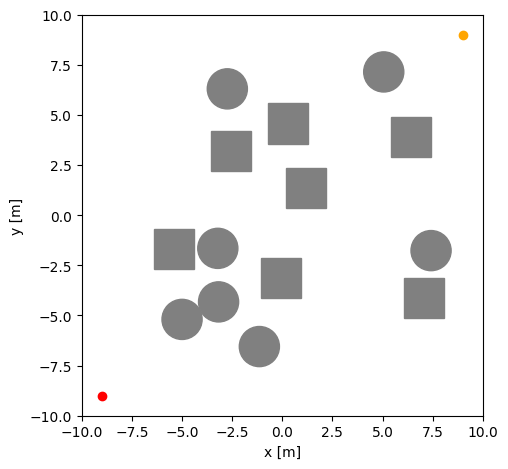

In [3]:
from envs.navigation_2d import Navigation2DEnv

env1 = Navigation2DEnv(v_min=0.0, v_max=2.0, omega_min=-1.0, omega_max=1.0, seed=2025)
env1.plot()

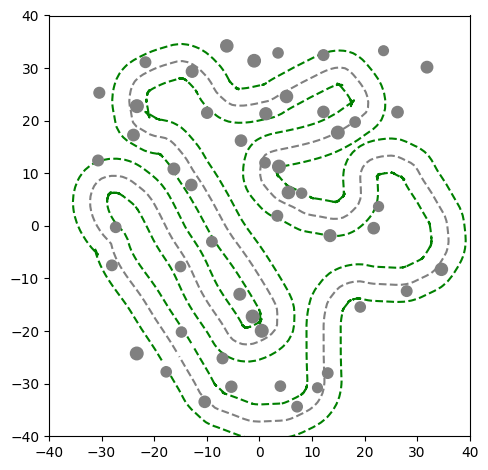

In [15]:
from envs.racing_env import RacingEnv

env2 = RacingEnv(v_max=8.0, acc_min=-2.0, acc_max=2.0, steer_min=-0.25, steer_max=0.25, seed=2025)
env2.plot()

In [8]:
import torch

import navigation2d
from controller.mppi import MPPI
from controller.cem import CEM

mppi = MPPI(env=env1, horizon=20, num_samples=100, sigmas=torch.tensor([0.5, 0.5]), lambda_=1.0)
cem = CEM(env=env1, horizon=20, num_samples=100, sigmas=torch.tensor([0.5, 0.5]), iters=3, elite_ratio=0.1)

traj = navigation2d.main(env=env1, solver=cem, max_steps=200) # save trajectory for plot

Device: cuda
Device: cuda


recording video:   0%|          | 0/200 [00:00<?, ?it/s]

Goal Reached!
average solve time: 71.938 ms
MoviePy - Building file video/navigation_2d.gif with imageio.


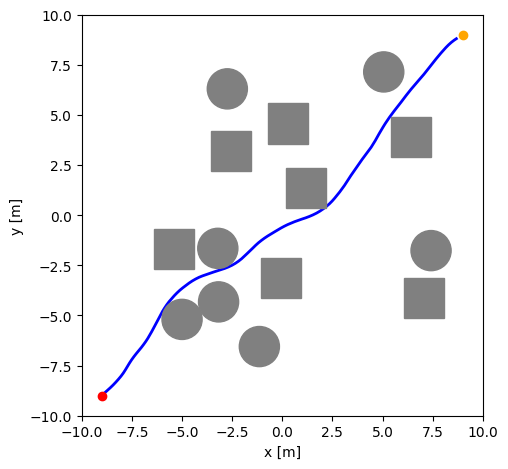

In [9]:
env1.plot()
env1._ax.plot(traj[:,0], traj[:,1], linewidth=2, color="blue")

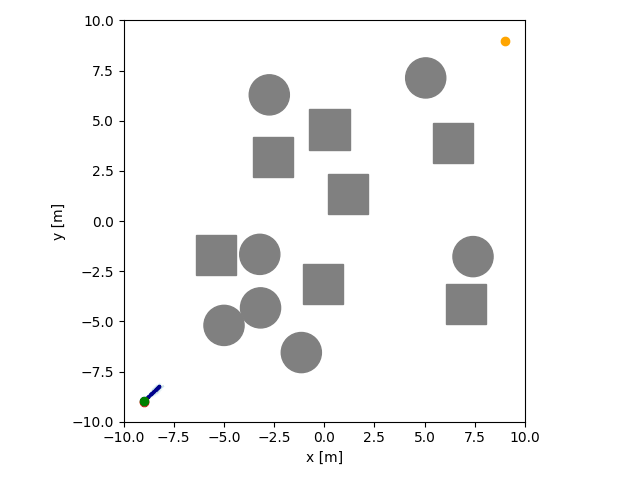

In [10]:
from IPython.display import Image

Image(filename='/content/video/navigation_2d.gif')

In [19]:
import torch

import racing
from controller.mppi import MPPI
from controller.cem import CEM

mppi = MPPI(env=env2, horizon=20, num_samples=200, sigmas=torch.tensor([0.5, 0.1]), lambda_=1.0)
cem = CEM(env=env2, horizon=20, num_samples=200, sigmas=torch.tensor([0.5, 0.1]), iters=3, elite_ratio=0.1)

traj = racing.main(env=env2, solver=mppi, max_steps=200) # save trajectory for plot

Device: cuda
Device: cuda


recording video:   0%|          | 0/200 [00:00<?, ?it/s]

average solve time: 421.1356282234192  [ms]
MoviePy - Building file video/racing.gif with imageio.


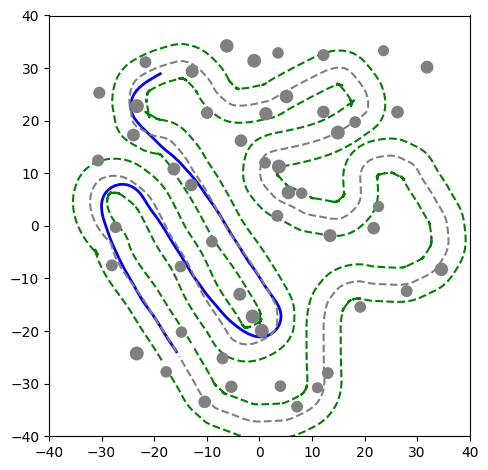

In [17]:
env2.plot()
env2._ax.plot(traj[:,0], traj[:,1], linewidth=2, color="blue")

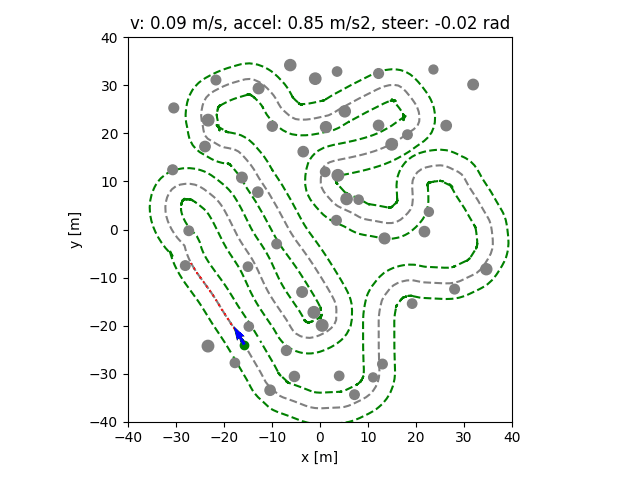

In [18]:
from IPython.display import Image

Image(filename='/content/video/racing.gif')